Ann Classification With Cars Predictions on Exercise2

In [725]:
# important Library are imported and installed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [726]:
# the file is loaded 
# # I encountered an error loading the csv file 
# due to characters in the csv file 
# which can't be decoded using the utf-8 encoding, 
# a default encoding when using pandas. 
# However, it was solved by adding encoding='ISO-8859-1'
# I chose to use above encoding because the 
# the dataset looks related to European dataset
df = pd.read_csv("car_purchasing.csv", encoding='ISO-8859-1')

In [727]:
# read out the first five rows in the dataset
# the dataset has 9 columns in total
# with column title names below
# customer name, customer e-mail, 
# country, gender, age, 
# annual Salary, credit card debt,
# net worth and car purchase amount
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85,62812.09,11609.38,238961.25,35321.46
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87,66646.89,9572.96,530973.91,45115.53
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15,53798.55,11160.36,638467.18,42925.71
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27,79370.04,14426.16,548599.05,67422.36
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31,59729.15,5358.71,560304.07,55915.46


In [728]:
# this code shows the title columns
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [729]:
# I checked if the dataset has any duplicate
# or not
# obviously the dataset looks promising
# as it has zero duplicate
df.duplicated().sum()

0

In [730]:
# Then the sum of missing values (NaNs) 
# in each column of the DataFrame df is calculated. 
# This is to make sure I am working 
# with a good clean dataset 
# which can have significant effect 
# on the performance of the model.
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [731]:
# I had error in the cell corr_matrix 
# which I think was due to the way 
# the columns name were named
df.rename(columns={'customer name': 'customer_name', 
                   'customer e-mail': 'customer_email',
                     'annual Salary': 'annual_Salary',
                       'credit card debt':'credit_card_debt', 'car purchase amount':'car_purchase_amount'}, inplace=True)

In [732]:
df.head()

,customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net worth,car_purchase_amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85,62812.09,11609.38,238961.25,35321.46
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87,66646.89,9572.96,530973.91,45115.53
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15,53798.55,11160.36,638467.18,42925.71
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27,79370.04,14426.16,548599.05,67422.36
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31,59729.15,5358.71,560304.07,55915.46


In [733]:
df['car_purchase_amount'].max()

80000.0

In [734]:
df['car_purchase_amount'].min()

9000.0

In [506]:
#df['car_purchase_amount'] = pd.to_numeric(df['car_purchase_amount'], errors='coerce')


In [735]:
# Define the function to classify price ranges
def classify_price_range(car_purchase_amount):
    #if car_purchase_amount < 9000:
        #return 0
    if car_purchase_amount < 37000:
        return 1
    elif 37000 <= car_purchase_amount < 50000:
        return 2
    elif 50000 <= car_purchase_amount < 70000:
        return 3
    elif 70000 <= car_purchase_amount < 80000:
        return 4
    else:
        return 0

# Apply the function to 'car_purchase_amount' column
df['price_range'] = df['car_purchase_amount'].apply(classify_price_range)

In [736]:
df.head()

,customer_name,customer_email,country,gender,age,annual_Salary,credit_card_debt,net worth,car_purchase_amount,price_range
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.85,62812.09,11609.38,238961.25,35321.46,1
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.87,66646.89,9572.96,530973.91,45115.53,2
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.15,53798.55,11160.36,638467.18,42925.71,2
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.27,79370.04,14426.16,548599.05,67422.36,3
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.31,59729.15,5358.71,560304.07,55915.46,3


In [690]:
# df['price_range'] = df['price_range'].astype(str).apply(lambda x: x.replace('.0',''))

In [737]:
removables = ["customer_name", "customer_email", "country"]

In [738]:
# let's filter out the unneeded columns
df = df.drop(removables, axis=1)

In [739]:
df.head()

,gender,age,annual_Salary,credit_card_debt,net worth,car_purchase_amount,price_range
0,0,41.85,62812.09,11609.38,238961.25,35321.46,1
1,0,40.87,66646.89,9572.96,530973.91,45115.53,2
2,1,43.15,53798.55,11160.36,638467.18,42925.71,2
3,1,58.27,79370.04,14426.16,548599.05,67422.36,3
4,1,57.31,59729.15,5358.71,560304.07,55915.46,3


In [720]:
df['price_range'] = df['price_range'].replace({0: "1: Cheap", 1: "2: Avg-", 2: "3: Avg+", 3: "4: Expensive"})

In [722]:
# actually my ascertion above was wrong
# the error was due to non-numeric columns
# which cannot work with the corr_matrix
# below is how I solved 
# that only the numeric columns in the DataFrame
# were read with the corr_matrix
# I sorted out the most important variables 
# to the car_purchase_amount
# numeric_df = df.select_dtypes(include=[np.number])
#corr_matrix = df.corr()['price_range']
#corr_matrix.sort_values(ascending=False)

In [748]:
df['price_range'] = df['price_range'].astype(int)


ValueError: invalid literal for int() with base 10: '2: Avg-'

In [741]:
# print(df['price_range'].unique())
unique_values = df['price_range'].unique()
unique_values_sorted = sorted(unique_values)
print(unique_values_sorted)


[0, 1, 2, 3, 4]


In [742]:
# Replace 'nan' string values with np.nan without using inplace method
df['price_range'] = df['price_range'].replace('nan', np.nan)

# Drop NaN values and then print unique values
print(df['price_range'].dropna().unique())



[1 2 3 4 0]


In [699]:
df.fillna(0, inplace = True)


In [743]:
# df['price_range'].max()

In [705]:
df['price_range'].min()

0

In [744]:
df.head(50)

,gender,age,annual_Salary,credit_card_debt,net worth,car_purchase_amount,price_range
0,0,41.85,62812.09,11609.38,238961.25,35321.46,1
1,0,40.87,66646.89,9572.96,530973.91,45115.53,2
2,1,43.15,53798.55,11160.36,638467.18,42925.71,2
3,1,58.27,79370.04,14426.16,548599.05,67422.36,3
4,1,57.31,59729.15,5358.71,560304.07,55915.46,3
5,1,56.82,68499.85,14179.47,428485.36,56612.00,3
6,1,46.61,39814.52,5958.46,326373.18,28925.71,1
7,1,50.19,51752.23,10985.70,629312.40,47434.98,2
8,0,46.58,58139.26,3440.82,630059.03,48013.61,2
9,1,43.32,53457.10,12884.08,476643.35,38189.51,2


In [745]:
df.tail(50)

,gender,age,annual_Salary,credit_card_debt,net worth,car_purchase_amount,price_range
450,1,48.51,65850.48,3912.39,419556.62,47869.83,2
451,1,55.52,66505.38,3942.77,621309.59,59984.16,3
452,0,47.47,58260.57,4658.41,507572.64,45271.46,2
453,0,25.18,45092.74,11380.09,158758.36,9000.00,1
454,1,44.70,63845.77,7761.85,505048.76,46012.11,2
455,1,46.47,55293.57,8276.64,169476.00,32967.20,1
456,0,32.80,87598.02,10814.58,485563.74,48785.16,2
457,1,42.79,71753.31,9119.79,400703.27,45824.57,2
458,1,47.55,45368.16,12203.49,577058.18,40102.11,2
459,0,48.15,45362.67,2524.99,399437.52,35457.15,1


In [746]:
df['price_range'] = df['price_range'].replace({0: "1: Cheap", 1: "2: Avg-", 2: "3: Avg+", 3: "4: Expensive"})

The X and y variables

In [747]:
# this LabelEncoder takes care of 
# other variables 
# except the target variable
X = df.drop("price_range", axis=1)

# have only the target variable 
# which is the dependent variable
y_temp = df['price_range']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
le = LabelEncoder()
y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_enc)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['int', 'str']

In [643]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
# I used the SelectKBest which is a variable/feature selector 
# (feature selection method)
# helps select the highly important variables which is related
# according to how their scoring features function. 
# Also, it showed the scores in descending form of order. 
# in this ann classification analysis
# The information given by the outcome showed 
# that the features that has higher scores 
# and reveal the higher the feature score the highly important the feature is, 
# and in this classification according 
# to the highest score are networth,
# annual_Salary, credit_card_debt,
# age and gender the least feature score
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# The chi-squared test showed the statistical test 
# which reveal the key factor or connection 
# between the category variables. 
# The test shows the frequencies of the category variables 
# and compared it to the expected frequency independently in this case . 
# Then indicated by measuring the dependency 
# between each feature and the target variable 
# which in this the 'quality' of the wine. 
# And, the higher chi-squared scores reveal there is 
# more correlations between the features (variables) and the targeted variable.
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
4,net worth,7238100.80
5,car_purchase_amount,1076871.25
2,annual_Salary,355284.63
3,credit_card_debt,2648.83
1,age,230.96
0,gender,1.42


Now Building the Neural Network

In [644]:
 # the usual train/validation/test -split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [646]:
categories = list(np.unique(df['price_range']))
print(categories)

['1', '1: Cheap', '2', '3', '4']


In [645]:
# categories = list(np.unique(df['price_range']))
#print(categories)

# Replace numerical values with corresponding categories
df['price_range'] = df['price_range'].replace({
    1: '1: Cheap',
    2: '2: Avg-',
    3: '3: Avg+',
    4: '4: Expensive'
})

# Get unique categories
categories = df['price_range'].unique()

# Remove any non-string values from the categories
categories = [cat for cat in categories if isinstance(cat, str)]

print(categories)


['1', '2', '3', '4', '1: Cheap']


In [128]:
# this the train/validation/test -split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [129]:
import pandas as pd

# Define the number of bins
num_bins = 4

# Create bins using pd.cut
bins = pd.cut(df['car_purchase_amount'], bins=num_bins, labels=False)

# Map bins to categories
categories = {
    0: 'Cheap',
    1: 'Avg-',
    2: 'Avg+',
    3: 'Expensive'
}

# Replace 'car_purchase_amount' column with bin categories
df['car_purchase_amount'] = bins.map(categories)

# Print unique categories
print([f'Bin_{i}: {categories[i]}' for i in range(num_bins)])

['Bin_0: Cheap', 'Bin_1: Avg-', 'Bin_2: Avg+', 'Bin_3: Expensive']


In [130]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df['car_purchase_amount'])

# Convert encoded labels to one-hot encoding
num_classes = len(label_encoder.classes_)
one_hot_encoded = tf.keras.utils.to_categorical(encoded_labels, num_classes=num_classes)

# Assign the one-hot encoded labels to y_train and y_val
y_train = one_hot_encoded[:len(X_train)]
y_val = one_hot_encoded[len(X_train):]

# Verify shapes
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)


Shape of y_train: (350, 4)
Shape of y_val: (150, 4)


In [131]:
 # our first version neural network
# no optimizations, probably not going to work well
model = keras.Sequential(
    [
        layers.BatchNormalization(input_shape=(len(X.columns),)),
        layers.Dense(16, activation="relu", kernel_regularizer=keras.regularizers.l1(0.1)),
        layers.Dense(32, activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(8, activation="relu"),
        layers.Dense(len(categories), activation="softmax")
    ]
)


# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()




c:\Users\Admin\DeepLearningSpringNew2024\.venv\lib\site-packages\keras\src\layers\normalization\batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_10          │ (None, 5)              │            20 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 960 (3.75 KB)

 Trainable params: 950 (3.71 KB)

 Non-trainable params: 10 (40.00 B)

In [133]:
# Example of label encoding for the target variable y_train
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target variable
y_train_encoded = label_encoder.fit_transform(y_train)


ValueError: y should be a 1d array, got an array of shape (350, 4) instead.

In [132]:
# I set the epochs to 500
model.fit(x=X_train, y=y_train, epochs=500, validation_data=(X_val, y_val))

Epoch 1/500
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2174 - loss: 3.7612

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 75
'y' sizes: 150


In [48]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

AttributeError: 'Sequential' object has no attribute 'history'

<Axes: >

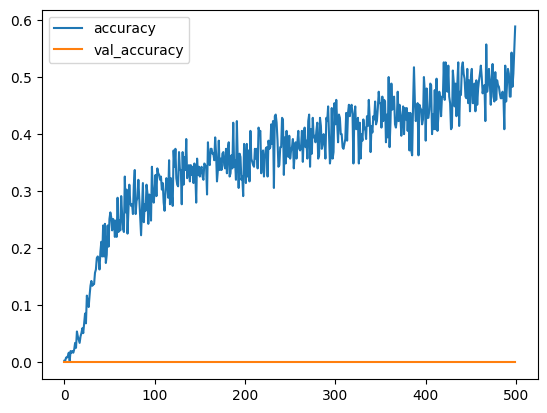

In [37]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [38]:
# compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[34.626712799072266, 0.0]

Train data evaluation:
[0.8677030801773071, 0.9514285922050476]


In [39]:
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


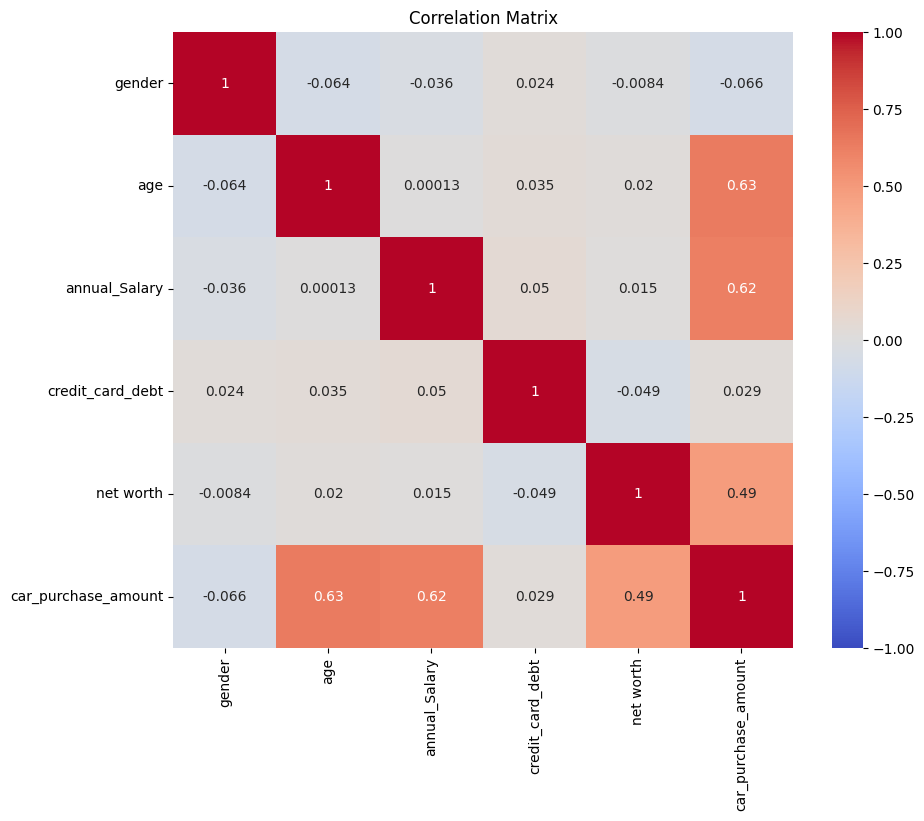

In [42]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [43]:
print(classification_report(y_test, test_predictions, target_names=categories))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

ValueError: Number of classes, 143, does not match size of target_names, 500. Try specifying the labels parameter